# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Zainal Fattah
- Email: project.zf01@gmail.com
- Id Dicoding:mosaicnim

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from pycaret.classification import *
from imblearn.combine import SMOTEENN

### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv("employee_data.csv")

In [3]:
df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [5]:
df.drop(columns=["EmployeeId", "EmployeeCount", "Over18", "StandardHours"], inplace=True)

## Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1058 non-null   float64
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

In [7]:
print("\nDescriptive Stats (Data Numerical):\n", df.describe())
print("\nDescriptive Stats (Data Categorical):\n", df.select_dtypes(include='object').describe())


Descriptive Stats (Data Numerical):
                Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1058.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.169187   802.485714          9.192517     2.912925   
std       9.135373     0.375094   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   

In [8]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

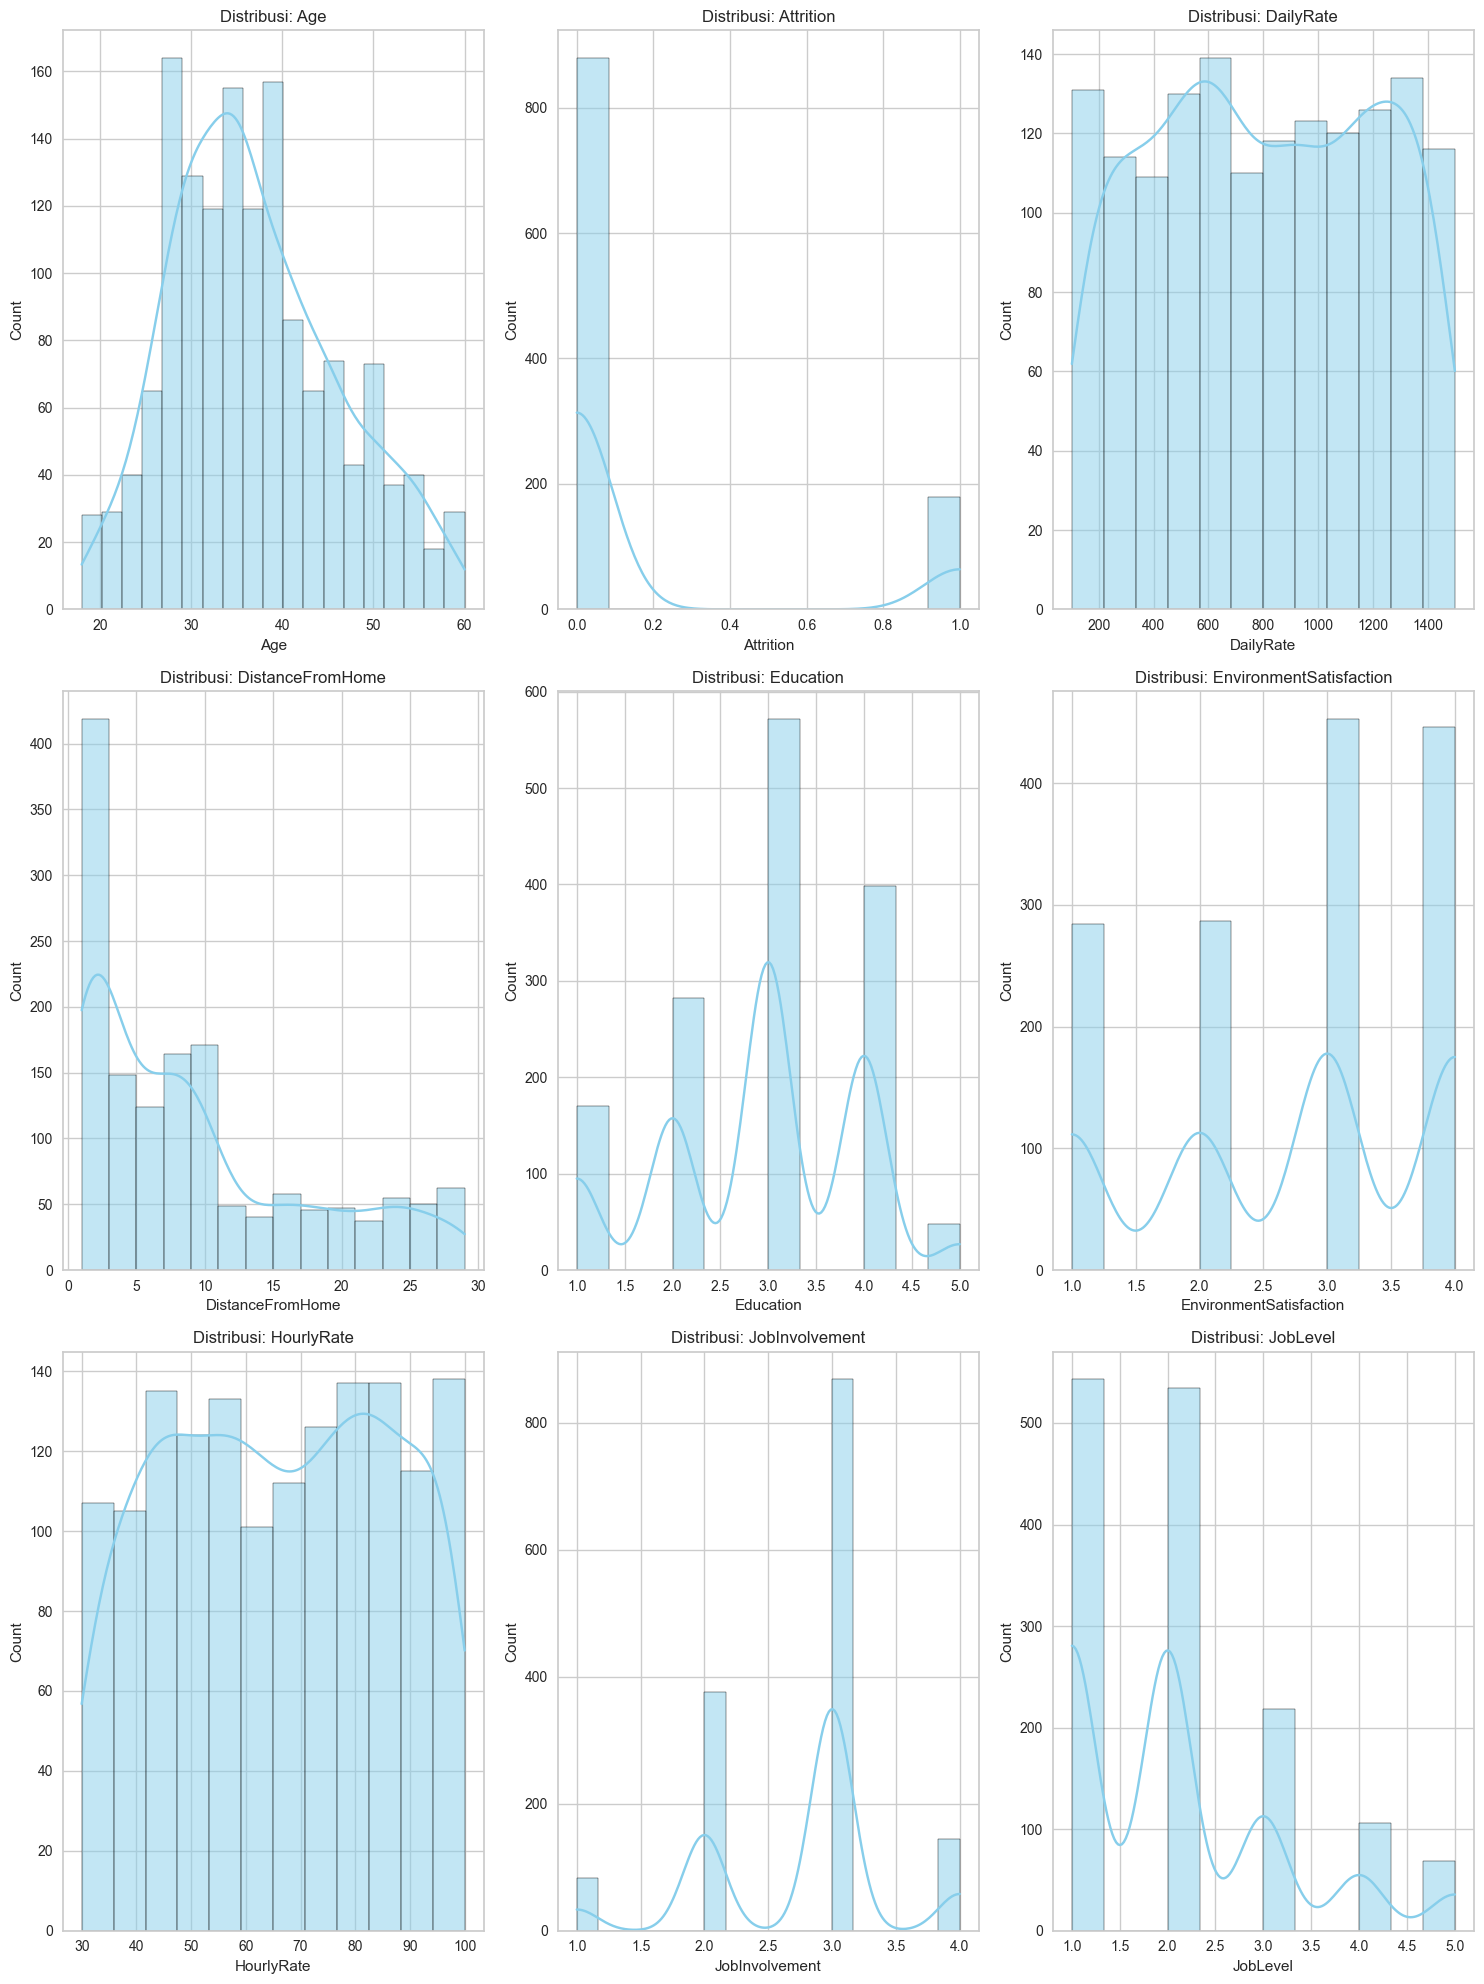

In [9]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols[:9]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribusi: {col}")
plt.tight_layout()
plt.show()

Visual diatas adalah distribusi data dari setiap kolom numerik menggunakan histogram dan KDE

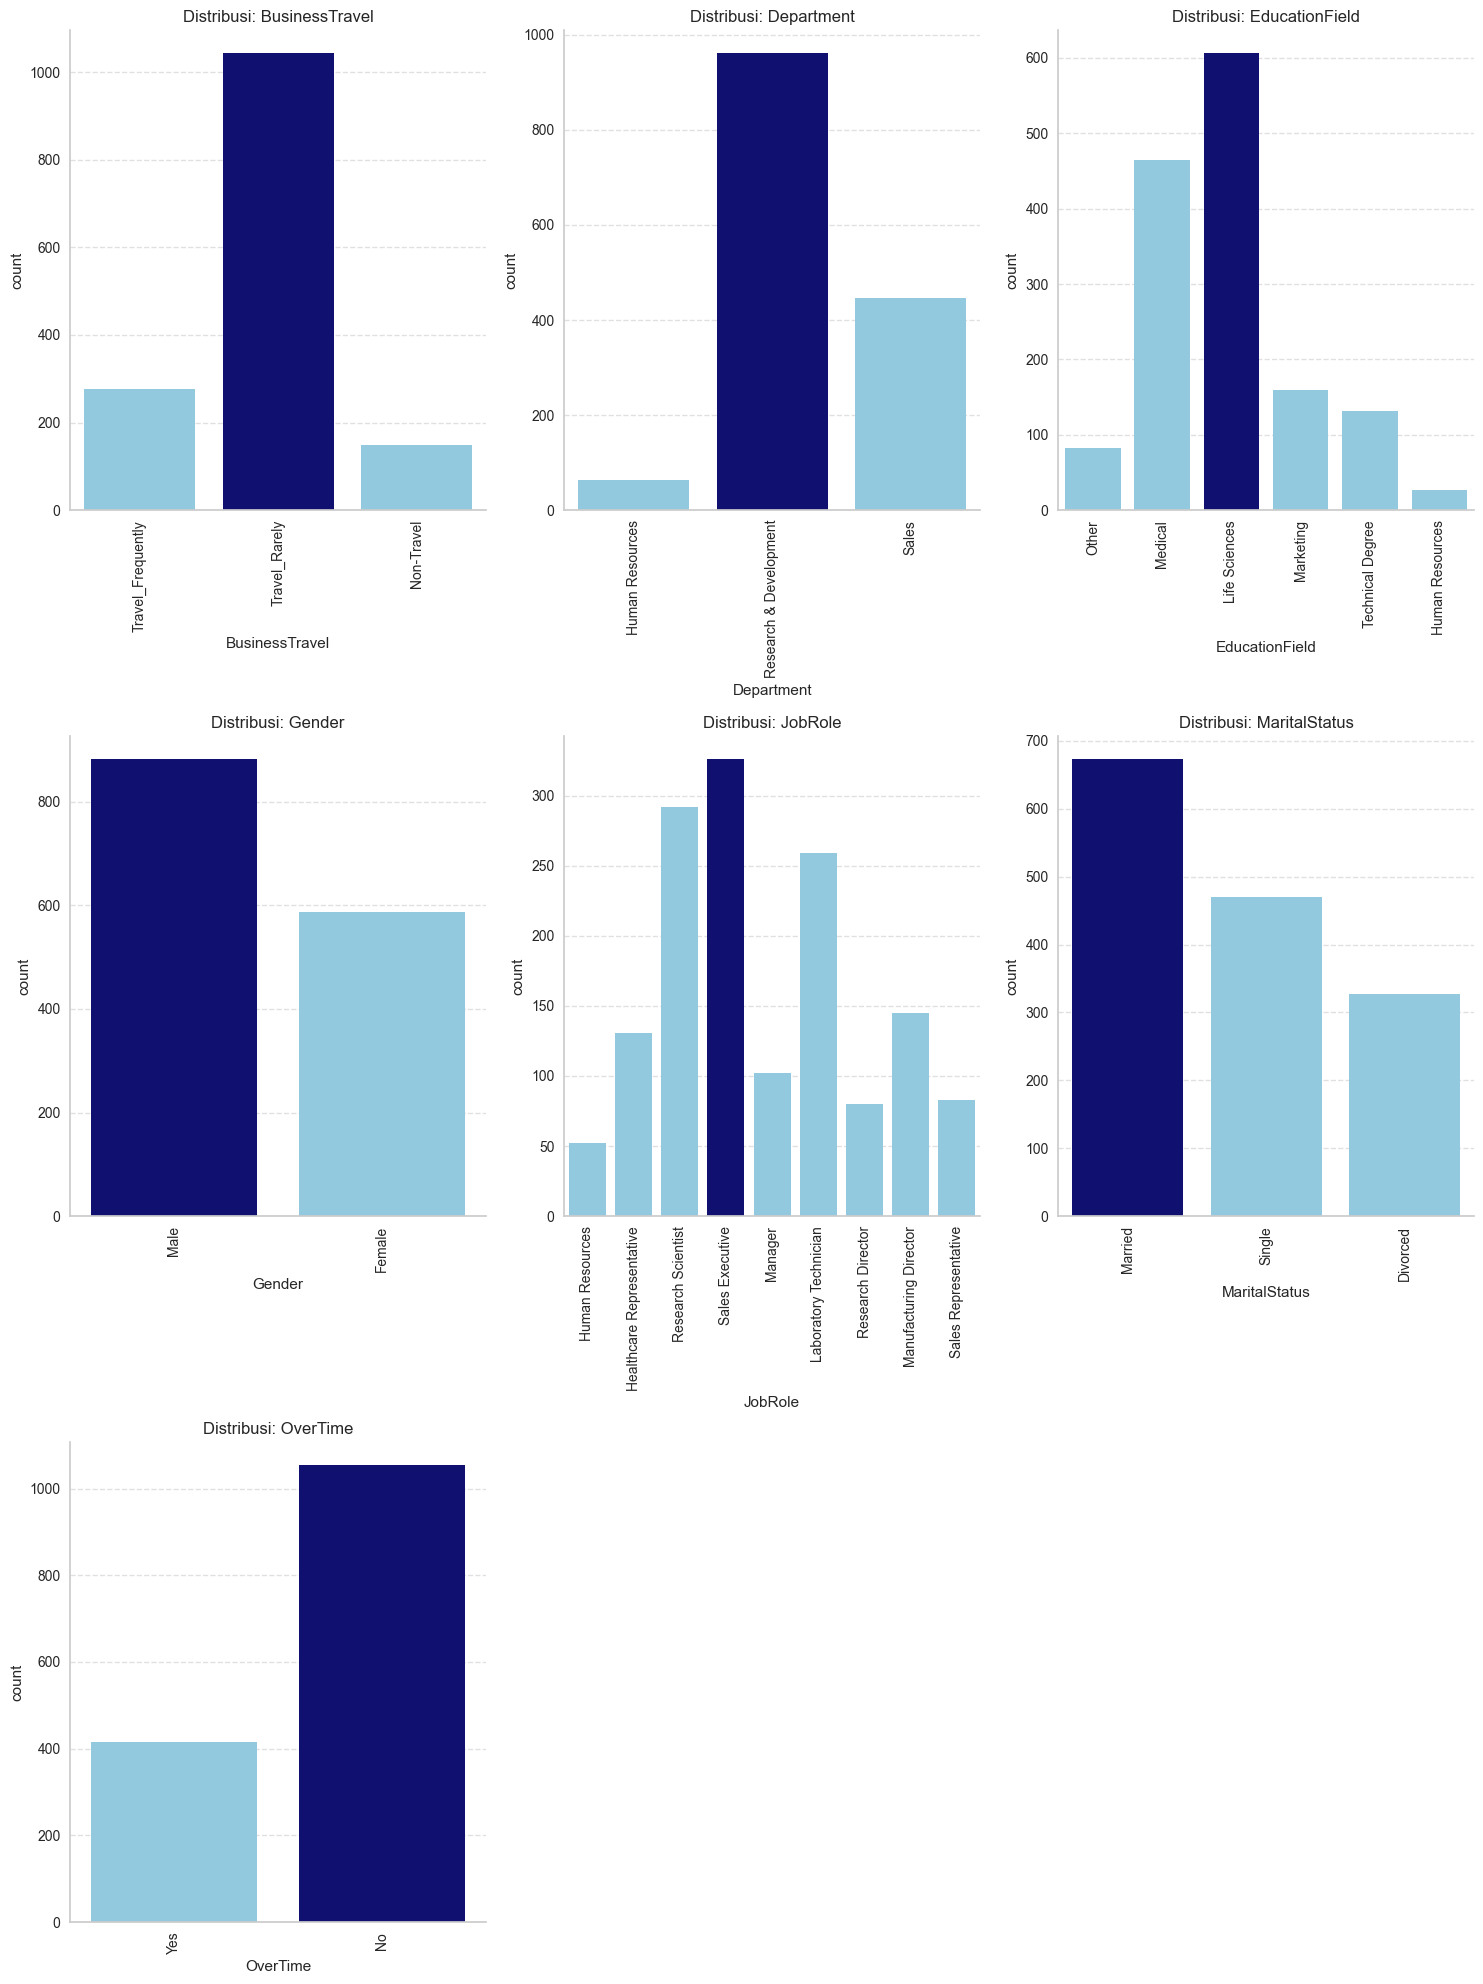

<Figure size 800x550 with 0 Axes>

In [10]:
# Membuat visualisasi distribusi untuk kolom kategorikal menggunakan countplot
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    categories = df[col].dropna().unique().tolist()
    counts = df[col].value_counts()
    max_count = counts.max()
    max_categories = counts[counts == max_count].index.tolist()
    colors = ['navy' if cat in max_categories else 'skyblue' for cat in categories]
    sns.countplot(x=col, data=df, order=categories, palette=colors)
    plt.title(f"Distribusi: {col}")
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    sns.despine()

plt.tight_layout()
plt.show()
    
plt.tight_layout()
plt.show()

Visual diatas merupakan distribusi dari setiap kolom kategorikal, dimana warna navy (tua) mewakili jumlah data yang paling banyak dari setiap kolom.

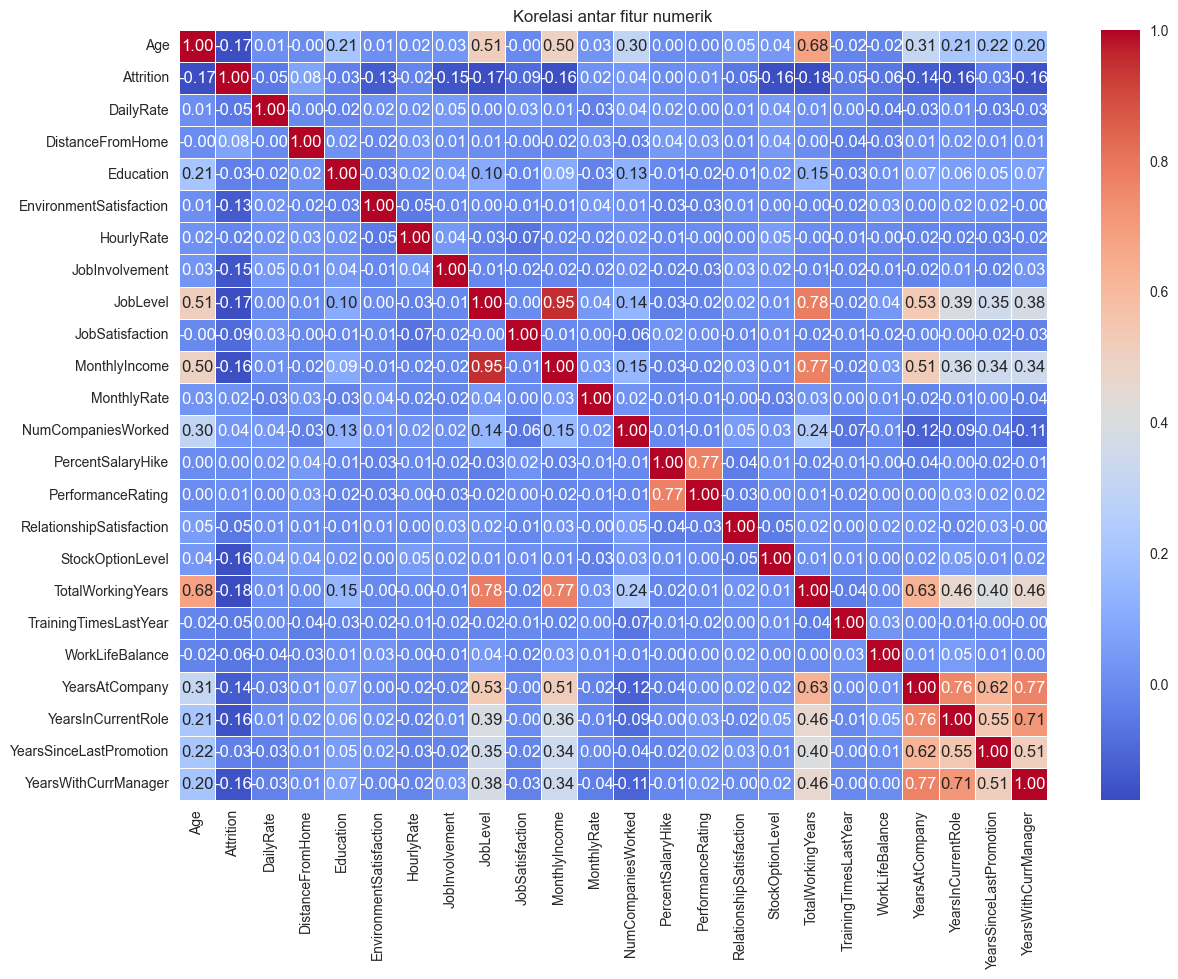

In [11]:
# Korelasi
plt.figure(figsize=(14, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi antar fitur numerik")
plt.show()

Visual diatas adalah korelasi dari kolom numerik.

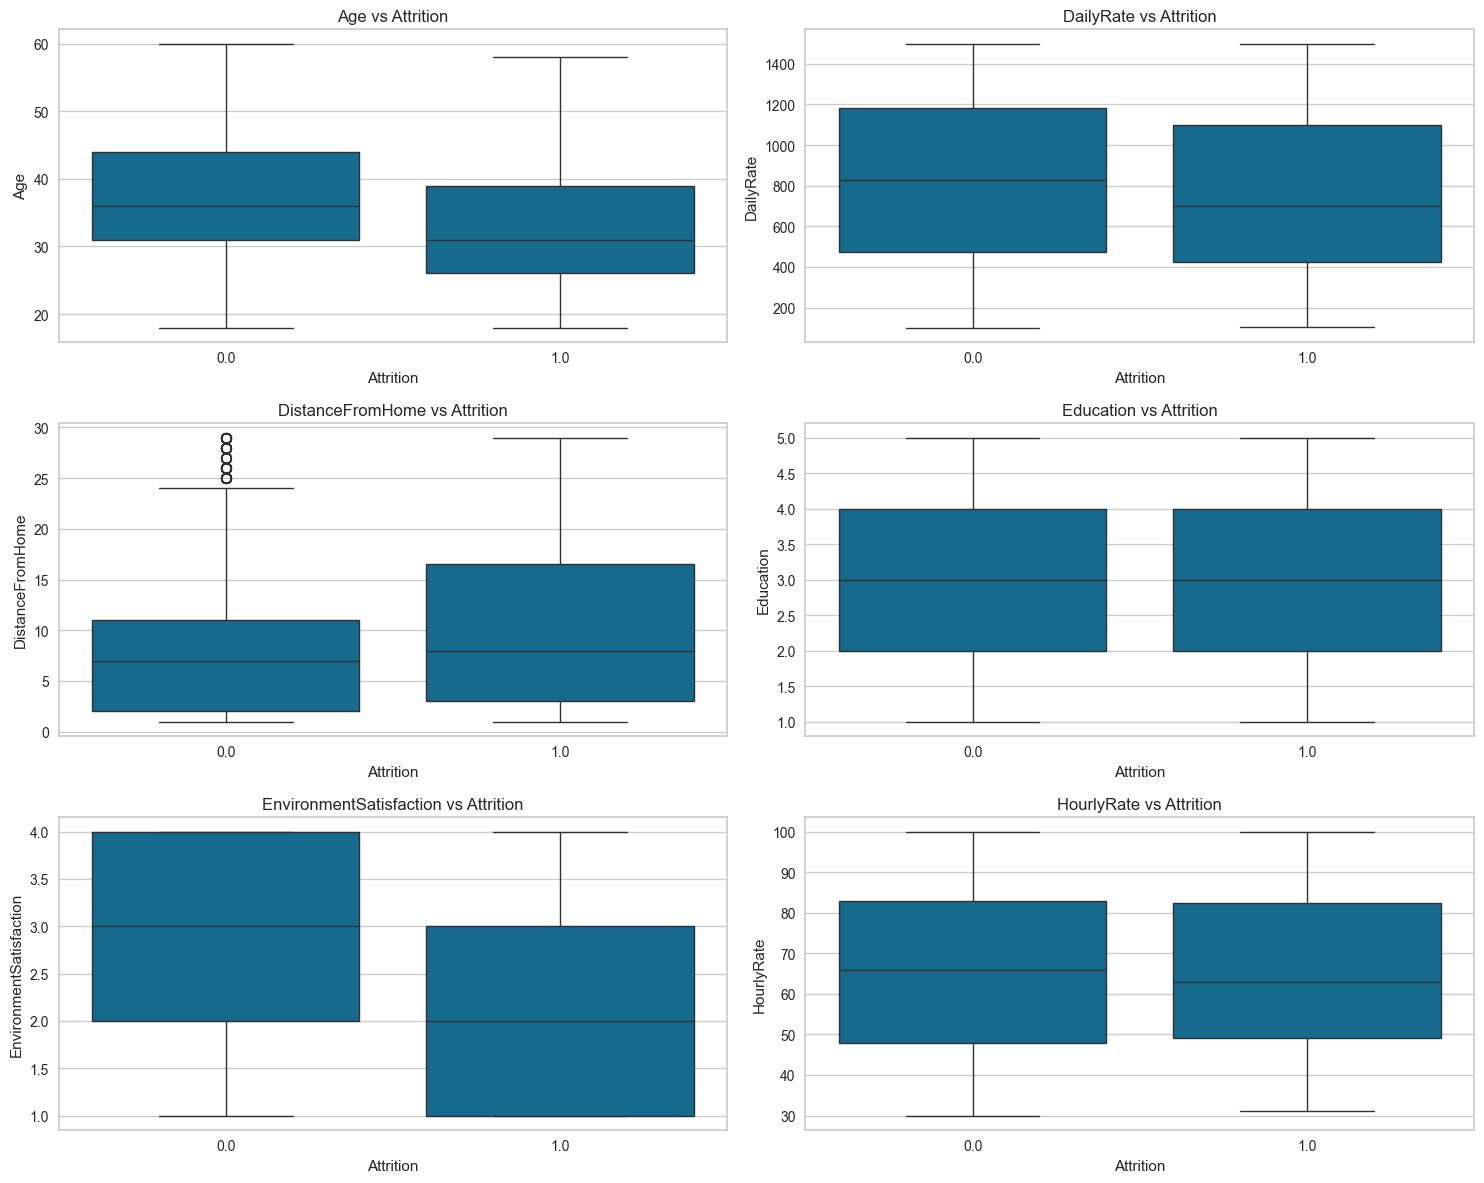

In [12]:
# Boxplot vs Attrition
numerical_cols_copy = [col for col in numerical_cols if col != 'Attrition']
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols_copy[:6]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f"{col} vs Attrition")
plt.tight_layout()
plt.show()

visual diatas bertujuan untuk menganalisis hubungan antara variabel numerik dengan variabel target Attrition menggunakan boxplot, agar kita bisa memahami perbedaan distribusi antar kategori, misalnya: 0 (No) dan 1 (Yes) pada Attrition

Distribusi nilai kolom Attrition

In [13]:
df['Attrition'].value_counts(normalize=True)

0.0    0.830813
1.0    0.169187
Name: Attrition, dtype: float64

Tingkat attrition di perusahaan Jaya Jaya Maju mencapai sekitar 16.92%, menunjukkan bahwa hampir 1 dari setiap 6 karyawan memilih keluar. Angka ini tergolong tinggi dan perlu mendapat perhatian serius dari manajemen. Analisis lebih lanjut dibutuhkan untuk mengidentifikasi faktor-faktor utama yang mendorong karyawan meninggalkan perusahaan.

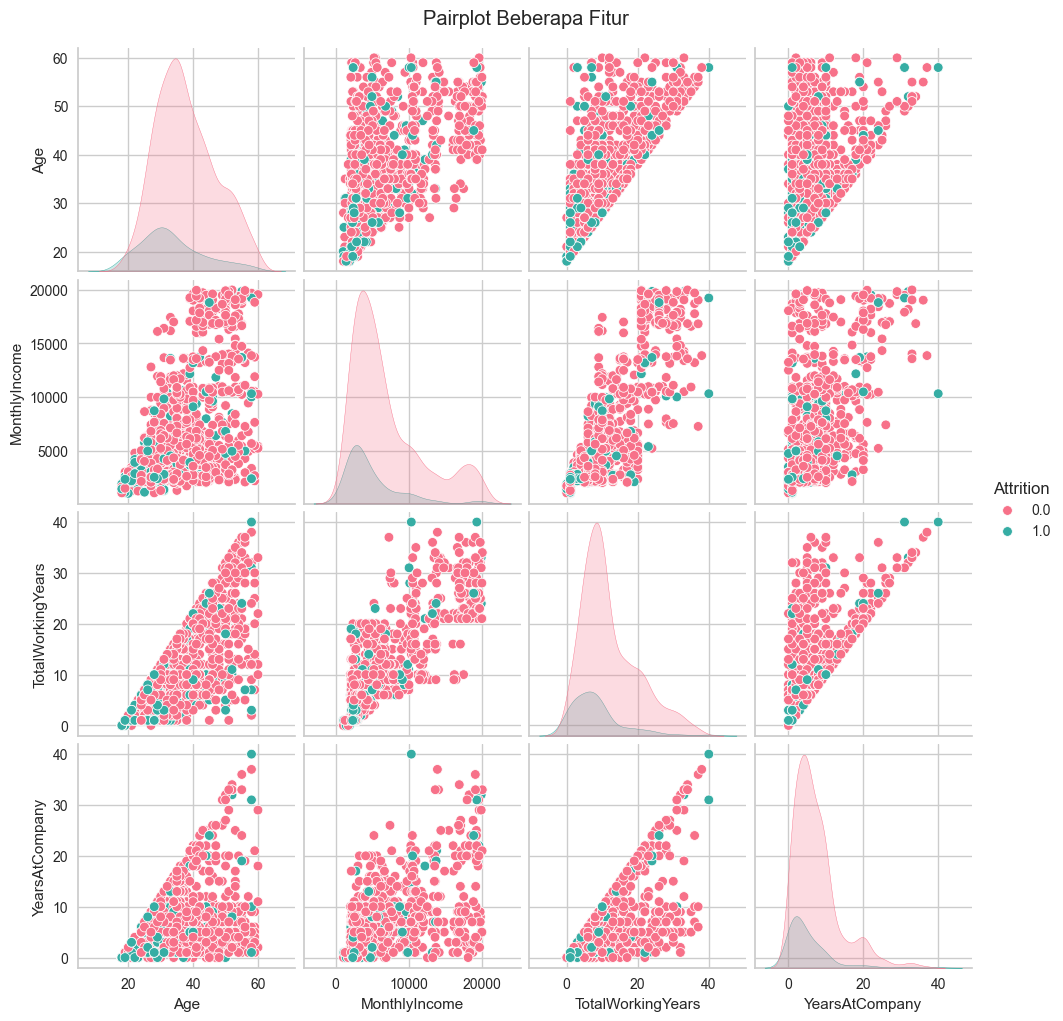

In [14]:
selected = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'Attrition']
sns.pairplot(df[selected], hue='Attrition', palette='husl')
plt.suptitle("Pairplot Beberapa Fitur", y=1.02)
plt.show()

In [15]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
    
numerical_kolom = [col for col in numerical_cols if col != 'Attrition']
for col in numerical_kolom:
    jumlah = len(detect_outliers_iqr(df, col))
    if jumlah > 0:
        print(f"Jumlah Outlier kolom {col}: {jumlah}")

Jumlah Outlier kolom MonthlyIncome: 114
Jumlah Outlier kolom NumCompaniesWorked: 52
Jumlah Outlier kolom PerformanceRating: 226
Jumlah Outlier kolom StockOptionLevel: 85
Jumlah Outlier kolom TotalWorkingYears: 63
Jumlah Outlier kolom TrainingTimesLastYear: 238
Jumlah Outlier kolom YearsAtCompany: 104
Jumlah Outlier kolom YearsInCurrentRole: 21
Jumlah Outlier kolom YearsSinceLastPromotion: 107
Jumlah Outlier kolom YearsWithCurrManager: 14


#### Mempersiapkan Pertanyaan business
1. Atribut mana yang paling berhubungan dengan Attrition?
2. Seberapa besar lembur (OverTime) berpengaruh terhadap keputusan karyawan untuk keluar?
3. Bagaimana hubungan antara kepuasan kerja, jarak rumah ke kantor, dan promosi terakhir terhadap attrition?
4. Departemen mana yang memiliki tingkat attrition tertinggi?
5. Bagaimana WorkLifeBalance (keseimbangan kerja dan kehidupan) mempengaruhi karyawan untuk mengambil keputusan keluar dari perusahaan?

#### 1. Hubungan Attrition dengan Atribut lainnya

In [16]:
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [17]:
df_encoded.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.255856
MaritalStatus               0.177989
DistanceFromHome            0.078074
Department                  0.060796
JobRole                     0.056146
EducationField              0.040568
NumCompaniesWorked          0.037429
MonthlyRate                 0.023299
Gender                      0.015887
PerformanceRating           0.007755
PercentSalaryHike           0.004907
BusinessTravel             -0.008008
HourlyRate                 -0.017524
YearsSinceLastPromotion    -0.031944
Education                  -0.032631
TrainingTimesLastYear      -0.047859
DailyRate                  -0.051992
RelationshipSatisfaction   -0.053417
WorkLifeBalance            -0.059556
JobSatisfaction            -0.091751
EnvironmentSatisfaction    -0.132848
YearsAtCompany             -0.135134
JobInvolvement             -0.150196
YearsWithCurrManager       -0.155962
YearsInCurrentRole         -0.158757
MonthlyIncome              -0.163600
S

Berdasarkan matriks korelasi, tidak terdapat atribut yang berkorelasi sangat kuat dengan Attrition. Akan tetapi, atribut yang paling berhubungan dengan Attrition adalah atribut OverTime, yang menunjukkan apakah karyawan bekerja lembur secara rutin. Setelah itu diikuti oleh atribut MaritalStatus dan DistanceFromHome, yang masing-masing menunjukkan status pernikahan serta jarak tempat tinggal karyawan dari kantor. [Menjawab nomor 1]

#### Setup style visual

In [18]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
color_keluar = "#db1514" # Merah untuk keluar
color_tetap = "#3498DB" # Biru untuk tidak keluar

#### 2. Pengaruh OverTime terhadap Attrition

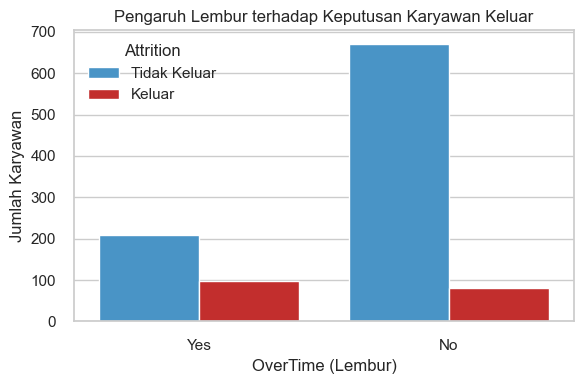

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='OverTime', hue='Attrition', data=df,
              palette={0: color_tetap, 1: color_keluar})
plt.title('Pengaruh Lembur terhadap Keputusan Karyawan Keluar')
plt.xlabel('OverTime (Lembur)')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Attrition', labels=['Tidak Keluar', 'Keluar'])
plt.tight_layout()
plt.show()

Berdasarkan visualisasi, terlihat bahwa proporsi karyawan yang keluar (Attrition) jauh lebih tinggi pada kelompok yang melakukan lembur (OverTime = Yes) dibandingkan yang tidak lembur. Meskipun jumlah karyawan yang lembur lebih sedikit, jumlah yang keluar hampir setara dengan yang tidak lembur. Hal ini menunjukkan bahwa lembur memiliki pengaruh signifikan terhadap keputusan karyawan untuk keluar dari perusahaan.[Menjawab nomor 2]

#### 3. Hubungan Job Satisfaction, DistanceFromHome, dan YearsSinceLastPromotion terhadap Attrition

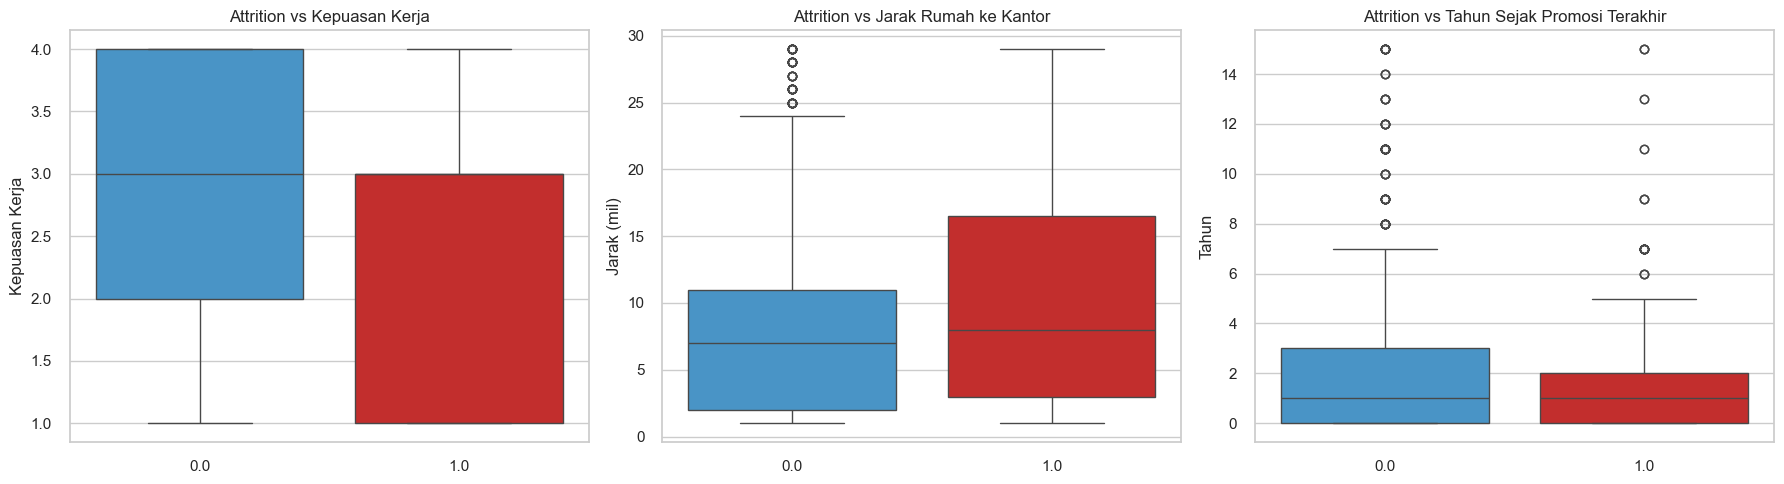

In [20]:
palette = {0: color_tetap, 1: color_keluar}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Attrition', y='JobSatisfaction', hue='Attrition', data=df, ax=axes[0],
            palette=palette, legend=False)
axes[0].set_title('Attrition vs Kepuasan Kerja')
axes[0].set_xlabel('')
axes[0].set_ylabel('Kepuasan Kerja')

sns.boxplot(x='Attrition', y='DistanceFromHome', hue='Attrition', data=df, ax=axes[1],
            palette=palette, legend=False)
axes[1].set_title('Attrition vs Jarak Rumah ke Kantor')
axes[1].set_xlabel('')
axes[1].set_ylabel('Jarak (mil)')

sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', hue='Attrition', data=df, ax=axes[2],
            palette=palette, legend=False)
axes[2].set_title('Attrition vs Tahun Sejak Promosi Terakhir')
axes[2].set_xlabel('')
axes[2].set_ylabel('Tahun')

plt.tight_layout()
plt.show()

[Menjawab nomor 3]
1. Kepuasan Kerja (Job Satisfaction)
   - Karyawan yang keluar (Attrition = 1.0) cenderung memiliki kepuasan kerja yang lebih rendah dibandingkan mereka yang tetap bekerja (Attrition = 0.0).
   - Median kepuasan kerja karyawan yang keluar berada pada level 2, sedangkan yang tetap bekerja berada pada level 3.
   - Ini menunjukkan bahwa kepuasan kerja yang rendah berkorelasi dengan kecenderungan untuk keluar.
2. Jarak Rumah ke Kantor (Distance From Home)
   - Karyawan yang keluar cenderung memiliki jarak rumah ke kantor yang lebih jauh dibandingkan yang tidak keluar.
   - Rentang distribusi untuk karyawan yang keluar lebih lebar, dengan banyak nilai ekstrem di atas 20 mil.
   - Hal ini mengindikasikan bahwa jarak yang jauh bisa menjadi faktor stres atau kelelahan, sehingga mempengaruhi keputusan untuk resign.
3. Tahun Sejak Promosi Terakhir (Years Since Last Promotion)
   - Perbedaan antara karyawan yang keluar dan tetap tidak terlalu mencolok.
   - Namun, terdapat sedikit kecenderungan bahwa karyawan yang keluar memiliki rata-rata waktu lebih lama sejak promosi terakhirnya.
   - Artinya, kurangnya promosi atau perkembangan karier bisa menjadi salah satu pemicu keputusan keluar, walaupun pengaruhnya tidak sekuat dua variabel sebelumnya.

#### 4. Departemen dengan tingkat attrition tertinggi

                          sum  count
Department                          
Human Resources           6.0     38
Research & Development  107.0    701
Sales                    66.0    319


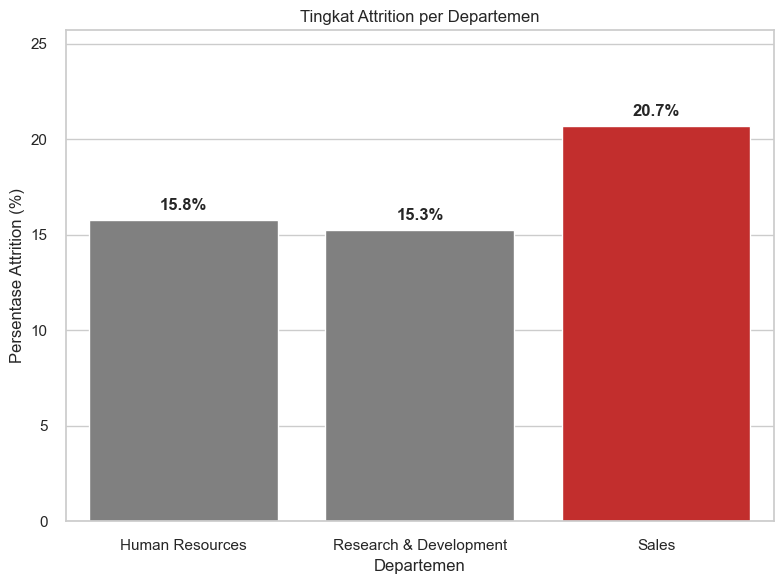

In [21]:
# Hitung jumlah karyawan keluar dan total per departemen
attrition_by_dept = df.groupby('Department')['Attrition'].agg(['sum', 'count'])
print(attrition_by_dept)
attrition_by_dept['percent'] = (attrition_by_dept['sum'] / attrition_by_dept['count']) * 100

# Buang departemen dengan jumlah karyawan nol jika ada
attrition_by_dept = attrition_by_dept.dropna()
dept_attr = attrition_by_dept['percent']

# Tentukan index bar tertinggi
max_index = dept_attr.idxmax()

# Buat warna: semua abu-abu, kecuali yang tertinggi jadi hijau
colors = ['gray' if dept != max_index else '#db1514' for dept in dept_attr.index]

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=dept_attr.index, y=dept_attr.values, palette=colors)

plt.ylabel('Persentase Attrition (%)')
plt.xlabel('Departemen')
plt.title('Tingkat Attrition per Departemen')
plt.ylim(0, max(dept_attr.max() + 5, 10))

# Tambahkan label persentase di atas bar
for i, v in enumerate(dept_attr.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Berdasarkan grafik, Departemen Sales memiliki tingkat attrition tertinggi sebesar 20,7%, dibandingkan Human Resources (15,8%) dan Research & Development (15,3%). Hal ini menunjukkan bahwa karyawan di departemen Sales cenderung lebih banyak yang keluar dari perusahaan.[[Menjawab nomor 4]

#### 5. WorkLifeBalance vs Attrition

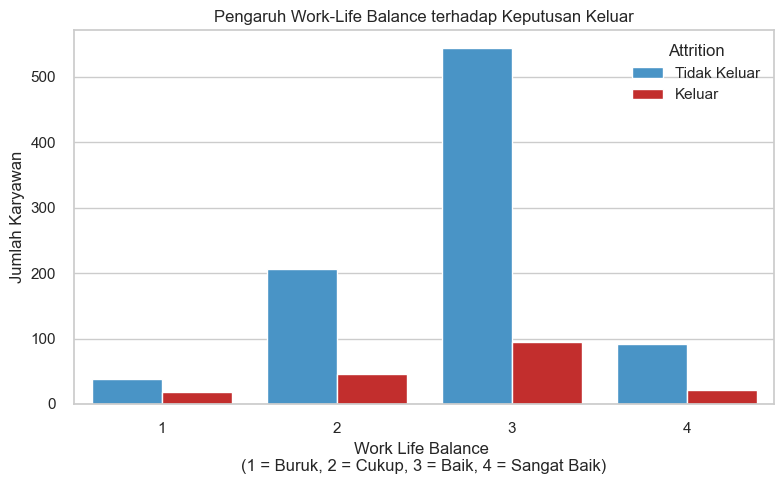

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df,
              palette={0: color_tetap, 1: color_keluar})
plt.title('Pengaruh Work-Life Balance terhadap Keputusan Keluar')
plt.xlabel('Work Life Balance \n(1 = Buruk, 2 = Cukup, 3 = Baik, 4 = Sangat Baik)')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Attrition', labels=['Tidak Keluar', 'Keluar'])
plt.tight_layout()
plt.show()

Berdasarkan grafik, karyawan dengan tingkat Work-Life Balance yang baik (nilai 3) memiliki jumlah tertinggi dalam kategori tidak keluar dari perusahaan. Namun, kategori ini juga menunjukkan jumlah karyawan keluar yang cukup signifikan. Sementara itu, semakin tinggi kualitas Work-Life Balance (nilai 4), jumlah karyawan yang keluar cenderung menurun. Sebaliknya, pada tingkat Work-Life Balance yang buruk (nilai 1 dan 2), proporsi karyawan yang keluar relatif lebih tinggi dibanding jumlah totalnya. Hal ini mengindikasikan bahwa kualitas Work-Life Balance berpengaruh terhadap keputusan karyawan untuk tetap bertahan atau keluar dari perusahaan.

## Data Preparation / Preprocessing

In [23]:
df.isnull().sum()

Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: i

Terdapat data yang kosong pada kolom Atrittion sebanyak 412 (28%) dari 1470 data, karena data nya berbentuk nilai diskrit yaitu 0 & 1 jadi solusi yang saya fikirkan hanyalah men-drop data tersebut karena tidak bisa diganti dengan nilai rata-rata. Mungkin Reviewer ada saran? 

In [24]:
df = df.dropna()
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Female,...,3,1,0,15,2,1,1,0,0,0
2,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,Male,...,3,3,3,18,2,4,10,0,2,7
3,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,Female,...,3,4,1,23,2,4,20,4,4,8
6,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,2,Male,...,4,3,3,6,2,2,4,3,0,2
7,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,4,Male,...,3,4,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,2,Male,...,3,1,0,10,2,2,10,7,1,9
1465,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,Female,...,3,4,0,10,4,4,1,0,0,0
1467,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,Female,...,3,4,0,1,4,2,1,1,0,0
1468,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,Male,...,3,2,1,6,0,3,4,2,0,0


In [25]:
df.drop_duplicates()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Female,...,3,1,0,15,2,1,1,0,0,0
2,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,Male,...,3,3,3,18,2,4,10,0,2,7
3,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,Female,...,3,4,1,23,2,4,20,4,4,8
6,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,2,Male,...,4,3,3,6,2,2,4,3,0,2
7,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,4,Male,...,3,4,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,2,Male,...,3,1,0,10,2,2,10,7,1,9
1465,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,Female,...,3,4,0,10,4,4,1,0,0,0
1467,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,Female,...,3,4,0,1,4,2,1,1,0,0
1468,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,Male,...,3,2,1,6,0,3,4,2,0,0


In [26]:
df.to_excel('clean_dataset.xlsx')
df.to_csv('clean_dataset.csv', index=False)

In [27]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded['Attrition'] = df['Attrition'].map({1.0: 1, 0.0: 0})

In [28]:
# data model 
df_model = df_encoded

In [29]:
# Memisahkan feature dan target
X = df_model.drop(['Attrition'], axis=1)
y = df_model['Attrition']

In [30]:
# Menerapkan SMOTE untuk mengatasi imbalance
smote = SMOTEENN(random_state=42)
X_imbalance, y_imbalance = smote.fit_resample(X, y)

In [31]:
# split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [32]:
data_summary = {
    "Features": list(X),
    "X_train Shape": X_train.shape,
    "X_test Shape": X_test.shape,
    "y_train Distribution": y_train.value_counts(),
    "y_test Distribution": y_test.value_counts()
}

In [33]:
for key, value in data_summary.items():
    print(f"{key} : {value}\n")

Features : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'Mar

## Modeling

In [34]:
!nvidia-smi

Tue May  6 22:29:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.02                 Driver Version: 576.02         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   56C    P0             10W /   70W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [35]:
# Memilih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight = 'balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [36]:
y_pred = model.predict(X_test)

## Evaluation

In [37]:
print("\n=== Random Forest ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== Random Forest ===
[[175   1]
 [ 32   4]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       176
           1       0.80      0.11      0.20        36

    accuracy                           0.84       212
   macro avg       0.82      0.55      0.55       212
weighted avg       0.84      0.84      0.79       212



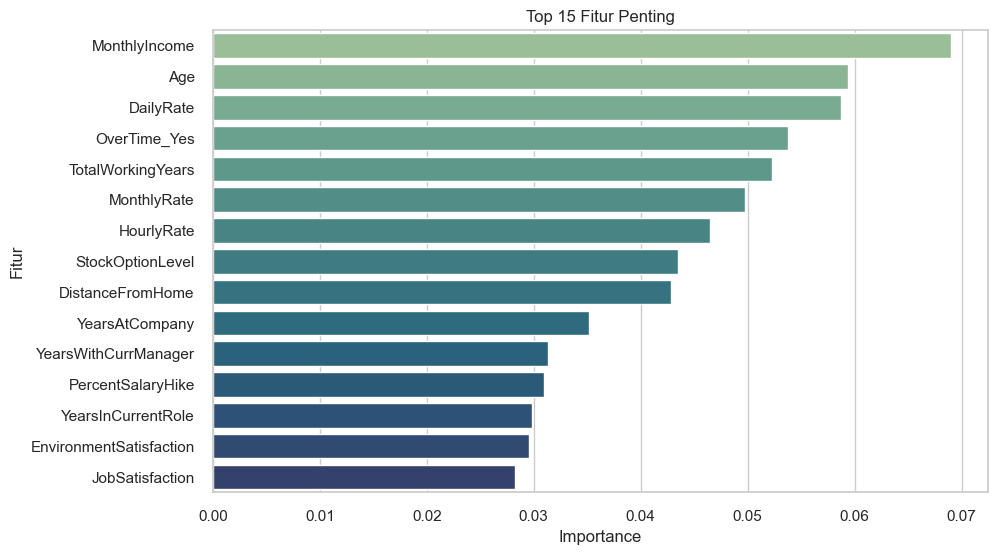

In [38]:
importances = model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="crest")
plt.title("Top 15 Fitur Penting")
plt.ylabel("Fitur")
plt.xlabel("Importance")
plt.show()

In [39]:
# Simpan model
joblib.dump(model, 'attrition_model.pkl')

['attrition_model.pkl']